**Problem Statement** : To predict which customer is more likely to purchase the newly introduced travel package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("tour_package.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# EDA & Preprocessing of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Observation :
* We can see here the total number of records are 4888 but some of the features have less non-null count, it means there are some missing values.
* There are some categorical as well as numerical features.

In [4]:
df.shape

(4888, 20)

### Observation :
* There are 4888 rows and 20 columns in our dataset.

# Handling Missing Values

In [5]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Observation :
* The total count of null values in each feature.

In [6]:
# Age
226/4888*100

4.623567921440261

In [7]:
# DurationOfPitch
251/4888*100

5.1350245499181675

In [8]:
# NumberOfTrips
140/4888*100

2.8641571194762685

In [9]:
# MonthlyIncome
233/4888*100

4.766775777414075

### Observation :
* For Age, DurationOfPitch, MonthlyIncome, we have to use fillna approach as these features have missing values between 3% - 50%.
* For TypeofContact, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, we have to use dropna approach as these features have missing values less than 3%.

In [10]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Observation :
* Minimum age of customer is 18 and Maximum age is 61 with mean of 37.
* Mean Duration of pitch is 15 mins to max of 127 mins.
* Mean Number of trips is 3 with maximum of 22.
* Average monthly income of customer is 23619 with maximum of 98678. 

In [11]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan, strategy="mean")

df[["Age","DurationOfPitch","MonthlyIncome"]] = si.fit_transform(df[["Age","DurationOfPitch","MonthlyIncome"]])


In [12]:
df.dropna(how="any",subset=["TypeofContact", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting"], axis=0, inplace=True)

In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Observation :
* By using SimpleImputer and putting mean strategy (as the features are not that much skewed), we have handeled the NaN values which are between 3%-50%.
* And by using dropna method we have removed the records of the features which have NaN values less than 3% out of whole data.

# Handling Outliers

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4586 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4586 non-null   int64  
 1   ProdTaken                 4586 non-null   int64  
 2   Age                       4586 non-null   float64
 3   TypeofContact             4586 non-null   object 
 4   CityTier                  4586 non-null   int64  
 5   DurationOfPitch           4586 non-null   float64
 6   Occupation                4586 non-null   object 
 7   Gender                    4586 non-null   object 
 8   NumberOfPersonVisiting    4586 non-null   int64  
 9   NumberOfFollowups         4586 non-null   float64
 10  ProductPitched            4586 non-null   object 
 11  PreferredPropertyStar     4586 non-null   float64
 12  MaritalStatus             4586 non-null   object 
 13  NumberOfTrips             4586 non-null   float64
 14  Passport

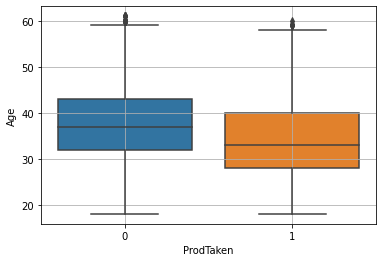

In [15]:
sns.boxplot(data=df, y="Age",x="ProdTaken")
plt.grid()

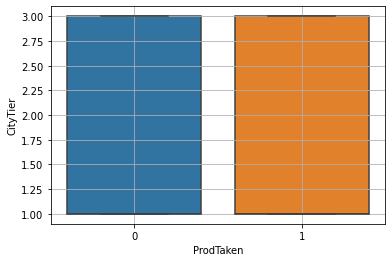

In [16]:
sns.boxplot(data=df, y="CityTier",x="ProdTaken")
plt.grid()

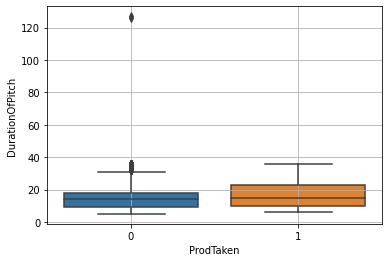

In [17]:
sns.boxplot(data=df, y="DurationOfPitch",x="ProdTaken")
plt.grid()

In [18]:
i = df[(df["DurationOfPitch"] > 120) & (df["ProdTaken"] == 0)].index
df.drop(i , axis=0, inplace=True)

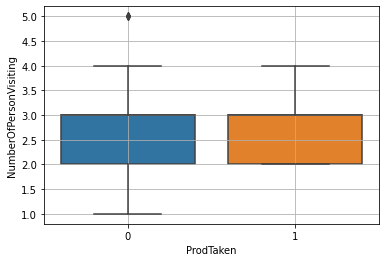

In [19]:
sns.boxplot(data=df, y="NumberOfPersonVisiting",x="ProdTaken")
plt.grid()

In [20]:
i = df[(df["NumberOfPersonVisiting"] > 4.5) & (df["ProdTaken"] == 0)].index
df.drop(i , axis=0, inplace=True)

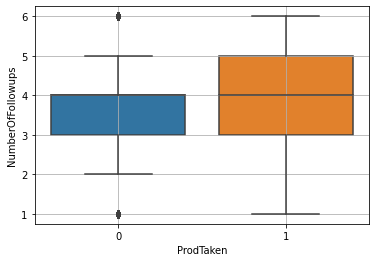

In [21]:
sns.boxplot(data=df, y="NumberOfFollowups",x="ProdTaken")
plt.grid()

In [22]:
i = df[(df["NumberOfFollowups"] > 5.5) & (df["ProdTaken"] == 0)].index
j = df[(df["NumberOfFollowups"] < 1.5) & (df["ProdTaken"] == 0)].index
df.drop(i,axis=0, inplace=True)
df.drop(j,axis=0, inplace=True)

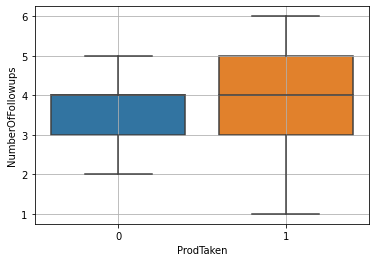

In [23]:
sns.boxplot(data=df, y="NumberOfFollowups",x="ProdTaken")
plt.grid()

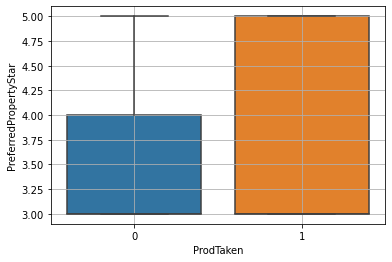

In [24]:
sns.boxplot(data=df, y="PreferredPropertyStar",x="ProdTaken")
plt.grid()

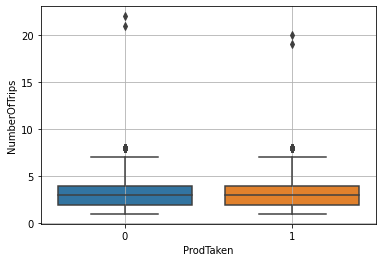

In [25]:
sns.boxplot(data=df, y="NumberOfTrips",x="ProdTaken")
plt.grid()

In [26]:
i = df[(df["NumberOfTrips"] > 20) & (df["ProdTaken"] == 0)].index
j = df[(df["NumberOfTrips"] > 17.5) & (df["ProdTaken"] == 1)].index

df.drop(i,axis=0, inplace=True)
df.drop(j,axis=0, inplace=True)

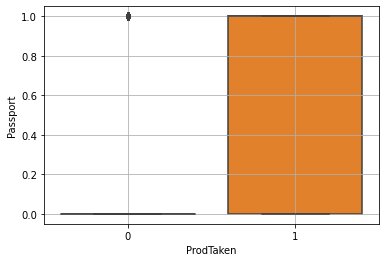

In [27]:
sns.boxplot(data=df, y="Passport",x="ProdTaken")
plt.grid()

In [28]:
i = df[(df["Passport"] > 0.9) & (df["ProdTaken"] == 0)].index
#df.drop(i , axis=0, inplace=True)
i

Int64Index([   3,    6,   11,   16,   17,   19,   31,   48,   52,   53,
            ...
            4759, 4768, 4784, 4793, 4795, 4800, 4801, 4802, 4803, 4809],
           dtype='int64', length=813)

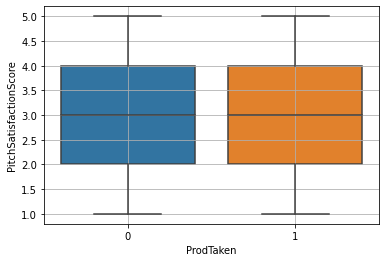

In [29]:
sns.boxplot(data=df, y="PitchSatisfactionScore",x="ProdTaken")
plt.grid()

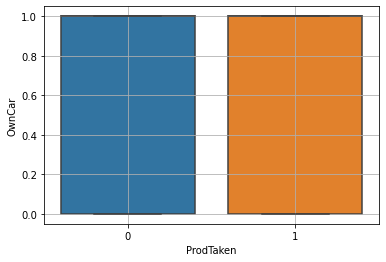

In [30]:
sns.boxplot(data=df, y="OwnCar",x="ProdTaken")
plt.grid()

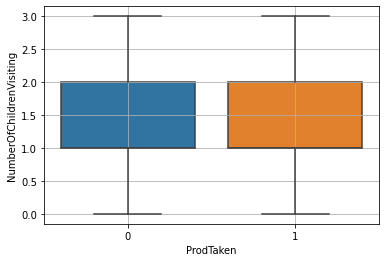

In [31]:
sns.boxplot(data=df, y="NumberOfChildrenVisiting",x="ProdTaken")
plt.grid()

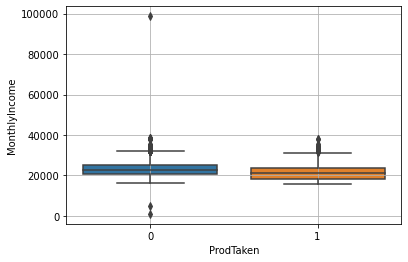

In [32]:
sns.boxplot(data=df, y="MonthlyIncome",x="ProdTaken")
plt.grid()

In [33]:
i = df[(df["MonthlyIncome"] > 90000) & (df["ProdTaken"] == 0)].index
j = df[(df["MonthlyIncome"] < 10000) & (df["ProdTaken"] == 0)].index

df.drop(i , axis=0, inplace=True)
df.drop(j, axis=0, inplace=True)

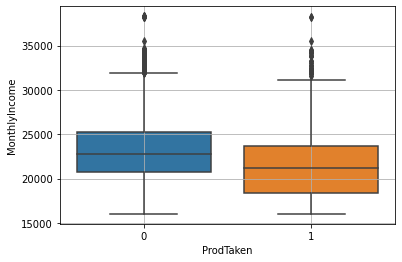

In [34]:
sns.boxplot(data=df, y="MonthlyIncome",x="ProdTaken")
plt.grid()

### Observation :
* Customers who purchased the product are mostly in age range of 28 -34.
* There are some outliers in duration of pitch for customers who didn't take the product and it is above 120 min.
* In the feature of No. of persons visiting, there are some outliers who have visited but didn't take the product.
* Number Of Followups has some outliers below whiskers line and above 5 followups.
* Number of trips has some outliers like 17 -20 who have purchased the product also.
* In passport feature the customres who have purchased the product they only have passport.
* Monthly income has extreme outliers.Customers who purchased product are in earning on average 18000-23000 monthly.

# Handling Skewness

In [35]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [36]:
x = df.drop(["ProdTaken","CustomerID","CityTier","PitchSatisfactionScore","ProductPitched","NumberOfFollowups","DurationOfPitch"], axis=1)
y = df["ProdTaken"]

In [37]:
x

,Age,TypeofContact,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.000000,Self Enquiry,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,49.000000,Company Invited,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0
2,37.000000,Self Enquiry,Free Lancer,Male,3,3.0,Single,7.0,1,0,0.0,Executive,17090.0
3,33.000000,Company Invited,Salaried,Female,2,3.0,Divorced,2.0,1,1,1.0,Executive,17909.0
4,37.622265,Self Enquiry,Small Business,Male,2,4.0,Divorced,1.0,0,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,Self Enquiry,Small Business,Male,3,4.0,Unmarried,2.0,1,1,1.0,Manager,26576.0
4884,28.000000,Company Invited,Salaried,Male,4,3.0,Single,3.0,1,1,2.0,Executive,21212.0
4885,52.000000,Self Enquiry,Salaried,Female,4,4.0,Married,7.0,0,1,3.0,Senior Manager,31820.0
4886,19.000000,Self Enquiry,Small Business,Male,3,3.0,Single,3.0,0,0,2.0,Executive,20289.0


In [38]:
# Skewness

In [39]:
numcols = x.select_dtypes(["int64","float64"]).columns

In [40]:
from scipy.stats import skew

Age columns has skewness: 0.4496045268400991
NumberOfPersonVisiting columns has skewness: 0.02481578589344246
PreferredPropertyStar columns has skewness: 0.89246298575962
NumberOfTrips columns has skewness: 0.9017437100073894
Passport columns has skewness: 0.8934263332343049
OwnCar columns has skewness: -0.47326610917581635
NumberOfChildrenVisiting columns has skewness: 0.2776780029890061
MonthlyIncome columns has skewness: 0.8147642418164975


<Figure size 360x144 with 0 Axes>

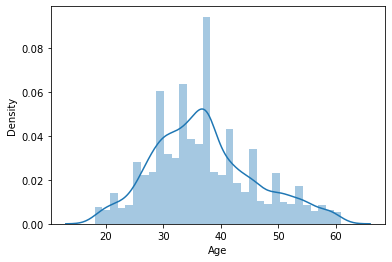

<Figure size 360x144 with 0 Axes>

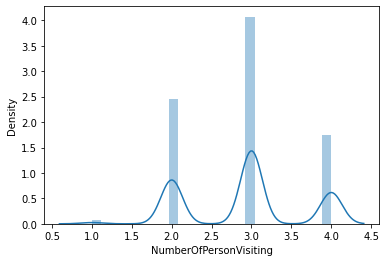

<Figure size 360x144 with 0 Axes>

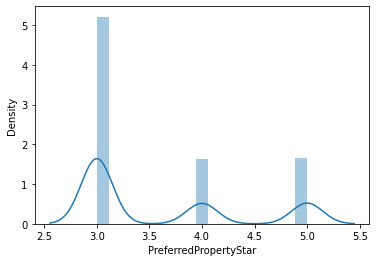

<Figure size 360x144 with 0 Axes>

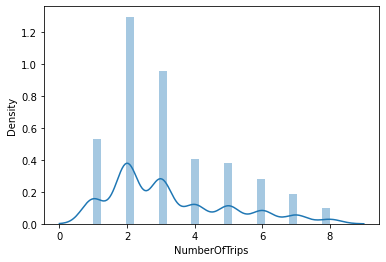

<Figure size 360x144 with 0 Axes>

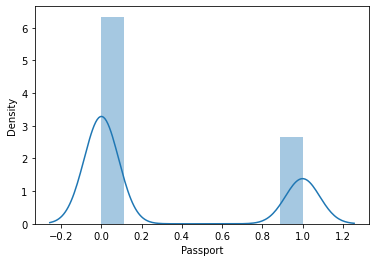

<Figure size 360x144 with 0 Axes>

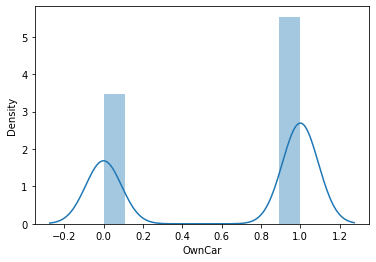

<Figure size 360x144 with 0 Axes>

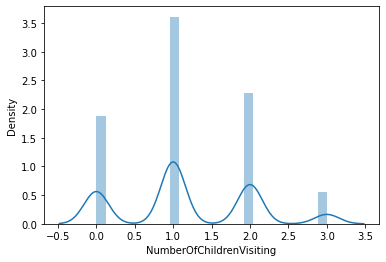

<Figure size 360x144 with 0 Axes>

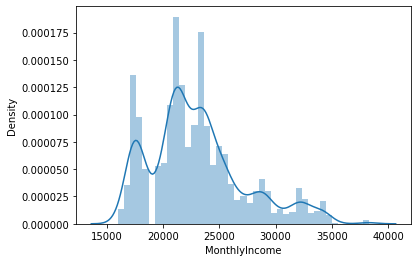

In [41]:
for i in x[numcols]:
   # print(i)
   # print(skew(x[i]),)
    
    print(f'{i} columns has skewness: {skew(x[i])}')
    
    
    plt.figure(figsize=(5,2))
    plt.figure()
    sns.distplot(x[i])

In [42]:
# Correlation
pd.concat([x,y], axis = 1).corr().style.background_gradient()

,Age,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
Age,1.000000,-0.016044,-0.027061,0.178609,0.022355,0.042390,-0.024375,0.428396,-0.150539
NumberOfPersonVisiting,-0.016044,1.000000,0.036727,0.203695,0.009296,0.005746,0.609132,0.158090,0.007623
PreferredPropertyStar,-0.027061,0.036727,1.000000,0.012189,-0.001555,0.012440,0.035713,-0.004971,0.099267
NumberOfTrips,0.178609,0.203695,0.012189,1.000000,0.005243,-0.021438,0.178197,0.140197,0.011721
Passport,0.022355,0.009296,-0.001555,0.005243,1.000000,-0.023490,0.023083,0.000496,0.270486
OwnCar,0.042390,0.005746,0.012440,-0.021438,-0.023490,1.000000,0.022856,0.064407,-0.014755
NumberOfChildrenVisiting,-0.024375,0.609132,0.035713,0.178197,0.023083,0.022856,1.000000,0.161632,0.005438
MonthlyIncome,0.428396,0.158090,-0.004971,0.140197,0.000496,0.064407,0.161632,1.000000,-0.141216
ProdTaken,-0.150539,0.007623,0.099267,0.011721,0.270486,-0.014755,0.005438,-0.141216,1.000000


In [43]:
pd.concat([x,y], axis=1).corr()["ProdTaken"].sort_values()

Age                        -0.150539
MonthlyIncome              -0.141216
OwnCar                     -0.014755
NumberOfChildrenVisiting    0.005438
NumberOfPersonVisiting      0.007623
NumberOfTrips               0.011721
PreferredPropertyStar       0.099267
Passport                    0.270486
ProdTaken                   1.000000
Name: ProdTaken, dtype: float64

### Observation :

* In correlation we have found out that which features have good correlation with the target column.
* NumberOfChildrenVisiting, NumberOfPersonVisiting, NumberOfTrips, PreferredPropertyStar, Passport these features have very less correlation with the target column, so we need to their skewness, but in distplot of skewness we can see that these features have some negative values are present in it, so we can't remove their skewness.


# Handling Categorical Data  (Encoding)

In [44]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

catcols = x.select_dtypes(object).columns

x[catcols] = oe.fit_transform(x[catcols])

In [45]:
x

,Age,TypeofContact,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.000000,1.0,2.0,1.0,3,3.0,2.0,1.0,1,1,0.0,2.0,20993.0
1,49.000000,0.0,2.0,2.0,3,4.0,0.0,2.0,0,1,2.0,2.0,20130.0
2,37.000000,1.0,0.0,2.0,3,3.0,2.0,7.0,1,0,0.0,1.0,17090.0
3,33.000000,0.0,2.0,1.0,2,3.0,0.0,2.0,1,1,1.0,1.0,17909.0
4,37.622265,1.0,3.0,2.0,2,4.0,0.0,1.0,0,1,0.0,1.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,1.0,3.0,2.0,3,4.0,3.0,2.0,1,1,1.0,2.0,26576.0
4884,28.000000,0.0,2.0,2.0,4,3.0,2.0,3.0,1,1,2.0,1.0,21212.0
4885,52.000000,1.0,2.0,1.0,4,4.0,1.0,7.0,0,1,3.0,3.0,31820.0
4886,19.000000,1.0,3.0,2.0,3,3.0,2.0,3.0,0,0,2.0,1.0,20289.0


By Encoding, we have converted all the categorical features into numeric format.

# Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x.iloc[:,:] = std.fit_transform(x.iloc[:,:])
x

,Age,TypeofContact,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0.437229,0.645308,-0.517553,-0.996524,0.138595,-0.730921,0.749855,-1.245960,1.541954,0.790983,-1.379785,0.331694,-0.478908
1,1.335134,-1.549648,-0.517553,0.783948,0.138595,0.525928,-1.361982,-0.683998,-0.648528,0.790983,0.958588,0.331694,-0.683922
2,-0.011724,0.645308,-3.640110,0.783948,0.138595,-0.730921,0.749855,2.125810,1.541954,-1.264249,-1.379785,-0.799187,-1.406102
3,-0.460676,-1.549648,-0.517553,-0.996524,-1.240059,-0.730921,-1.361982,-0.683998,1.541954,0.790983,-0.210599,-0.799187,-1.211541
4,0.058118,0.645308,1.043726,0.783948,-1.240059,0.525928,-1.361982,-1.245960,-0.648528,0.790983,-1.379785,-0.799187,-1.078745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.335134,0.645308,1.043726,0.783948,0.138595,0.525928,1.805773,-0.683998,1.541954,0.790983,-0.210599,0.331694,0.847385
4884,-1.021866,-1.549648,-0.517553,0.783948,1.517249,-0.730921,0.749855,-0.122036,1.541954,0.790983,0.958588,-0.799187,-0.426883
4885,1.671848,0.645308,-0.517553,-0.996524,1.517249,0.525928,-0.306063,2.125810,-0.648528,0.790983,2.127774,1.462575,2.093146
4886,-2.032009,0.645308,1.043726,0.783948,0.138595,-0.730921,0.749855,-0.122036,-0.648528,-1.264249,0.958588,-0.799187,-0.646150


We have converted all the values in one unit by using scaling.

# Analysis

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

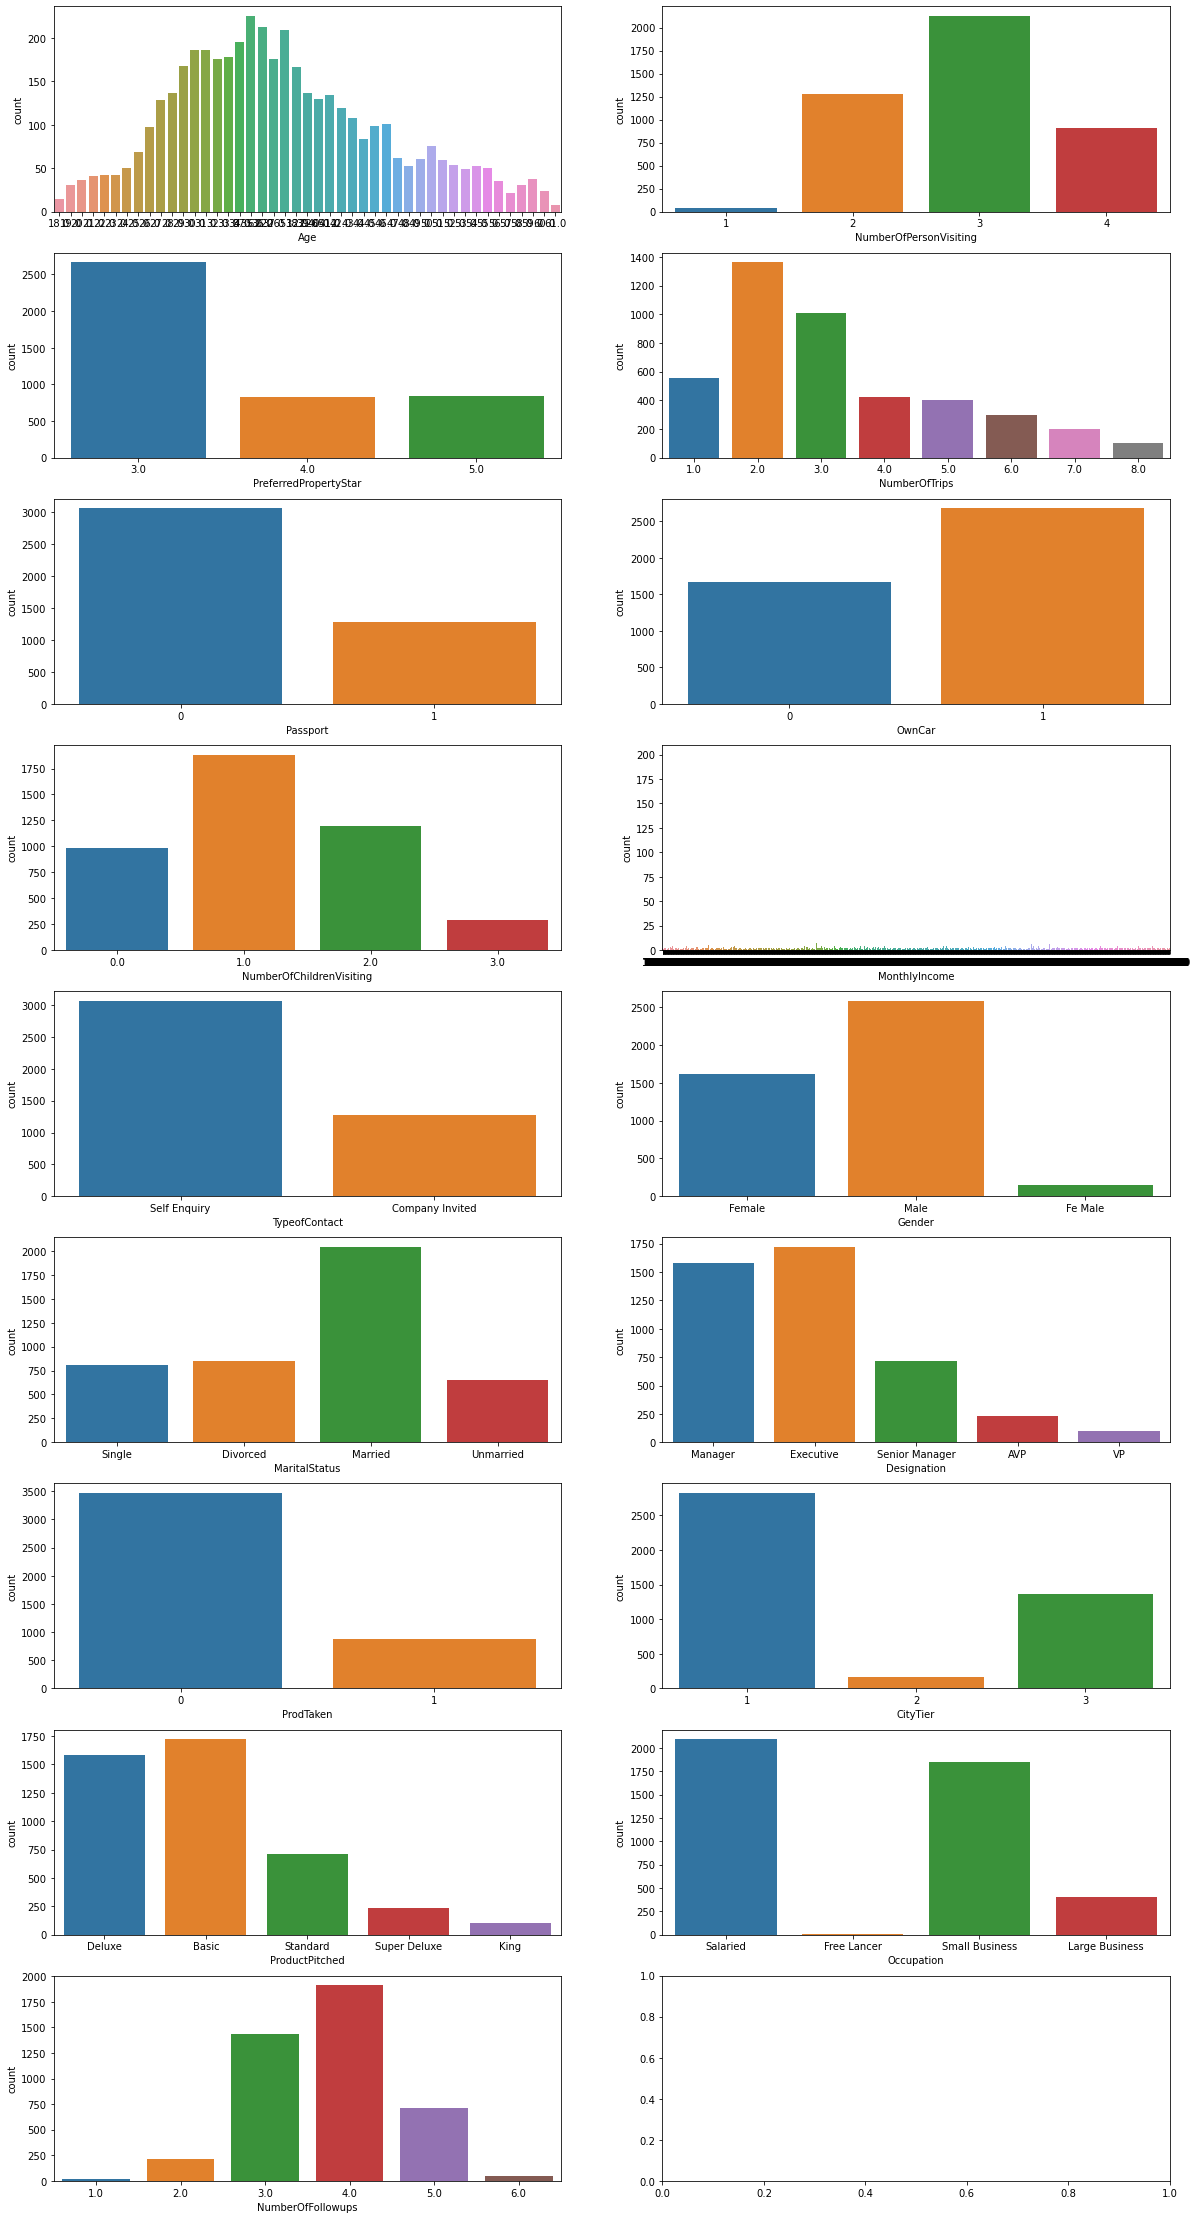

In [47]:
fig, axes = plt.subplots(9,2, figsize =(20,40))
sns.countplot(df["Age"],ax = axes[0,0])
sns.countplot(df['NumberOfPersonVisiting'],ax = axes[0,1])
sns.countplot(df['PreferredPropertyStar'],ax = axes[1,0])
sns.countplot(df['NumberOfTrips'],ax = axes[1,1])
sns.countplot(df['Passport'],ax = axes[2,0])
sns.countplot(df['OwnCar'],ax = axes[2,1])
sns.countplot(df['NumberOfChildrenVisiting'],ax = axes[3,0])
sns.countplot(df['MonthlyIncome'],ax = axes[3,1])
sns.countplot(df['TypeofContact'],ax = axes[4,0])
sns.countplot(df["Gender"],ax = axes[4,1])
sns.countplot(df['MaritalStatus'],ax = axes[5,0])
sns.countplot(df['Designation'],ax = axes[5,1])
sns.countplot(df['ProdTaken'],ax = axes[6,0])
sns.countplot(df['CityTier'],ax = axes[6,1])
sns.countplot(df['ProductPitched'],ax = axes[7,0])
sns.countplot(df['Occupation'],ax = axes[7,1])
sns.countplot(df['NumberOfFollowups'],ax = axes[8,0])

In [48]:
df["Age"].value_counts()

35.000000    225
36.000000    212
37.622265    209
34.000000    195
30.000000    186
31.000000    186
33.000000    178
37.000000    176
32.000000    176
29.000000    168
38.000000    167
28.000000    137
39.000000    137
41.000000    134
40.000000    130
27.000000    129
42.000000    119
43.000000    108
46.000000    101
45.000000     99
26.000000     97
44.000000     84
50.000000     75
25.000000     68
47.000000     62
49.000000     60
51.000000     59
52.000000     54
54.000000     53
48.000000     53
24.000000     50
55.000000     50
53.000000     49
23.000000     42
22.000000     42
21.000000     41
59.000000     37
20.000000     36
56.000000     35
19.000000     31
58.000000     30
60.000000     24
57.000000     21
18.000000     14
61.000000      8
Name: Age, dtype: int64

In [49]:
df["MonthlyIncome"].value_counts()

23619.853491    200
17342.000000      7
21020.000000      7
21288.000000      7
20855.000000      7
               ... 
25447.000000      1
24667.000000      1
17148.000000      1
23926.000000      1
24829.000000      1
Name: MonthlyIncome, Length: 2230, dtype: int64

### Observation :
* Most of the customers are in 27-45 age range.
* Out of all customers 2700 customers prefer 3 star property.
* Most of the customers take 2 trips per year.
* Number of non-having passport customers is more.
* Nearly 2700 people own car.
* Most of the customers travelled with only one child.
* Majority of customer monthly income is in 20000-25000 range.
* Nearly 3100 custmore self enquiried for the packages.
* Nearly 2600 customers are male.
* 2000 customers are married
* Nearly 1700 customers are Executive, followed by 1600 are managers.
* Nearly 900 customers accepted product offered last time.
* Nearly 3000 customers are from Tier 1 cities.
* Basic package was pitched to nearly 1700 of customers and 1550 were pitched Deluxe package.
* Occupation of nearly 2500 customer is salaried.
* Most of the customers were followed up 4 times.
 

# Model Building and Evaluation

In [50]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [51]:
def models(model):
    model= model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training accuracy:{train}\nTesting accuracy:{test}")
    print(classification_report(ytest,pred))
    return model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [53]:
logreg = models(LogisticRegression())

Training accuracy:0.8205128205128205
Testing accuracy:0.8275862068965517
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1047
           1       0.68      0.24      0.36       258

    accuracy                           0.83      1305
   macro avg       0.76      0.61      0.63      1305
weighted avg       0.81      0.83      0.79      1305



In [54]:
knn = models(KNeighborsClassifier())

Training accuracy:0.8944773175542406
Testing accuracy:0.8475095785440613
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1047
           1       0.73      0.36      0.48       258

    accuracy                           0.85      1305
   macro avg       0.80      0.66      0.70      1305
weighted avg       0.83      0.85      0.83      1305



In [55]:
svm = models(SVC())

Training accuracy:0.8530571992110454
Testing accuracy:0.8375478927203065
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1047
           1       0.73      0.28      0.40       258

    accuracy                           0.84      1305
   macro avg       0.79      0.63      0.66      1305
weighted avg       0.82      0.84      0.81      1305



In [56]:
dt = models(DecisionTreeClassifier())

Training accuracy:1.0
Testing accuracy:0.8521072796934865
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1047
           1       0.63      0.61      0.62       258

    accuracy                           0.85      1305
   macro avg       0.77      0.76      0.76      1305
weighted avg       0.85      0.85      0.85      1305



# Tuning of Decision Tree

In [57]:
paramaters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 20)),
    "min_samples_leaf": list(range(1, 20))
}

In [58]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), paramaters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=19; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=13; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END criteri

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [59]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=14)

In [60]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1}

In [61]:
dt = models(DecisionTreeClassifier(max_depth=5, min_samples_leaf=1))

Training accuracy:0.8461538461538461
Testing accuracy:0.8352490421455939
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1047
           1       0.67      0.33      0.44       258

    accuracy                           0.84      1305
   macro avg       0.76      0.65      0.67      1305
weighted avg       0.82      0.84      0.81      1305



In [62]:
from sklearn import tree

[Text(461.4230769230769, 747.4499999999999, 'X[8] <= 0.447\ngini = 0.326\nsamples = 3042\nvalue = [2418, 624]'),
 Text(150.23076923076923, 611.55, 'X[0] <= -1.751\ngini = 0.229\nsamples = 2122\nvalue = [1842, 280]'),
 Text(42.92307692307692, 475.65, 'X[2] <= -1.298\ngini = 0.497\nsamples = 56\nvalue = [30, 26]'),
 Text(21.46153846153846, 339.74999999999994, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(64.38461538461539, 339.74999999999994, 'X[12] <= -0.483\ngini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(42.92307692307692, 203.8499999999999, 'X[12] <= -0.623\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(21.46153846153846, 67.94999999999993, 'gini = 0.475\nsamples = 36\nvalue = [22, 14]'),
 Text(64.38461538461539, 67.94999999999993, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(85.84615384615384, 203.8499999999999, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(257.53846153846155, 475.65, 'X[5] <= 1.154\ngini = 0.216\nsamples = 2066\nvalue = [1812, 254]'),
 Te

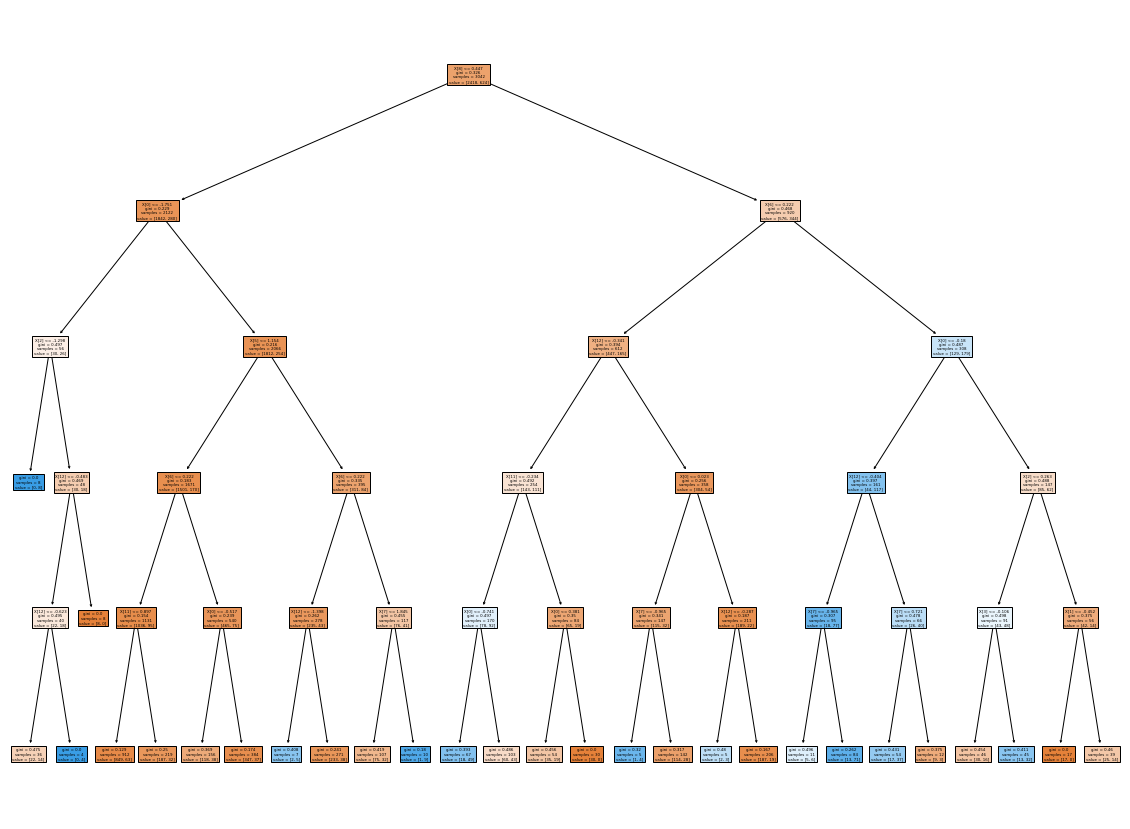

In [63]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
dt.fit(xtrain,ytrain)
fig,ax = plt.subplots(figsize=(20,15))
tree.plot_tree(dt, filled=True)

# Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cv = cross_val_score(dt,x,y,cv=5, scoring = "accuracy")

In [66]:
cv

array([0.84367816, 0.83678161, 0.83199079, 0.83199079, 0.84119678])

In [67]:
cv.mean()

0.8371276272105603

# Tuning of KNN

In [68]:
testac = []
trainac = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

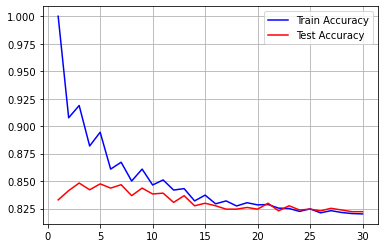

In [69]:
plt.plot(range(1,31),trainac, color="b", label="Train Accuracy")
plt.plot(range(1,31),testac, color="r", label="Test Accuracy")
plt.grid()
plt.legend()

In [70]:
knn = models(KNeighborsClassifier(n_neighbors=21))

Training accuracy:0.8287310979618672
Testing accuracy:0.8298850574712644
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1047
           1       0.76      0.20      0.32       258

    accuracy                           0.83      1305
   macro avg       0.80      0.59      0.61      1305
weighted avg       0.82      0.83      0.79      1305



# Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [72]:
gnb = models(GaussianNB())

Training accuracy:0.8241288625904011
Testing accuracy:0.825287356321839
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1047
           1       0.60      0.34      0.43       258

    accuracy                           0.83      1305
   macro avg       0.73      0.64      0.66      1305
weighted avg       0.80      0.83      0.81      1305



## Ensemble Learning

In [74]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [75]:
models(AdaBoostClassifier())

Training accuracy:0.8323471400394478
Testing accuracy:0.8352490421455939
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1047
           1       0.69      0.30      0.42       258

    accuracy                           0.84      1305
   macro avg       0.77      0.63      0.66      1305
weighted avg       0.82      0.84      0.81      1305



AdaBoostClassifier()

In [76]:
models(GradientBoostingClassifier())

Training accuracy:0.8645627876397107
Testing accuracy:0.8513409961685824
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1047
           1       0.81      0.33      0.46       258

    accuracy                           0.85      1305
   macro avg       0.83      0.65      0.69      1305
weighted avg       0.85      0.85      0.82      1305



GradientBoostingClassifier()

In [77]:
from xgboost import XGBClassifier

In [78]:
models(XGBClassifier())

Training accuracy:0.9921104536489151
Testing accuracy:0.8911877394636015
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1047
           1       0.82      0.57      0.68       258

    accuracy                           0.89      1305
   macro avg       0.86      0.77      0.81      1305
weighted avg       0.89      0.89      0.88      1305



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
models(XGBClassifier(max_depth=2))

Training accuracy:0.8530571992110454
Testing accuracy:0.842911877394636
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1047
           1       0.73      0.33      0.45       258

    accuracy                           0.84      1305
   macro avg       0.79      0.65      0.68      1305
weighted avg       0.83      0.84      0.82      1305



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
models(BaggingClassifier(LogisticRegression()))

Training accuracy:0.8201840894148587
Testing accuracy:0.8275862068965517
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1047
           1       0.67      0.25      0.37       258

    accuracy                           0.83      1305
   macro avg       0.76      0.61      0.63      1305
weighted avg       0.81      0.83      0.79      1305



BaggingClassifier(base_estimator=LogisticRegression())

# Conclusion

             Models                              Training Acccuracy         Testing Accuracy         Accuracy 
    
    1.  Logistic Regression                            0.82                       0.82                  0.83
    2.  KNN (Tuned)                                    0.82                       0.82                  0.83
    3.  SVM                                            0.85                       0.83                  0.84
    4.  Decision Tree Classifier (Tuned)               0.84                       0.83                  0.84
    5.  Naive Bayes (GaussianNB)                       0.82                       0.82                  0.83                                   
      * Ensembled Techniques
    6.  AdaBoost Classifier                            0.83                       0.83                  0.84
    7.  GradientBoost Classifier                       0.86                       0.85                  0.85
    8.  XGBClassifier (Tuned)                          0.85                       0.84                  0.84
    9.  BaggingClassifier(LogisticRegression)          0.82                       0.82                  0.83

### Observation :

* In model buliding and evaluation part we have used 9 alorithms.

* Among them all the models are giving generalised models but AdaBoost Classifier, GradientBoost Classifier, Tuned XGBClassifier are giving good accuracy of model.
